In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('corona.csv')
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [3]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [4]:
list1=['Lat','Long_','Recovered','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate']

In [5]:
imp=SimpleImputer(strategy='mean')
for l in list1:
    df[l]=imp.fit_transform(df[l].values.reshape(-1,1))

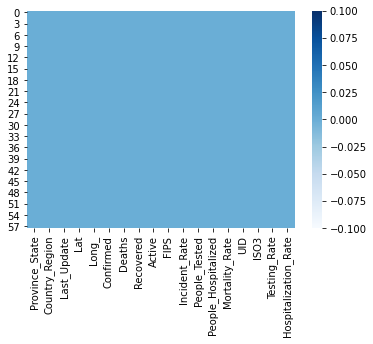

In [6]:
sns.heatmap(df.isnull(),cmap='Blues')

now we have no null values present in our dataset. they are replaced with the mean value that is present in the particular column.

In [7]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.694329,48.873770,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,2.378302e+07,1898.951207,3.781861
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.872800,-99.697700,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,2741.843521,12.829963
50%,38.978600,-86.797300,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,8.400003e+07,3501.526835,14.342541
75%,42.214075,-77.072550,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,8.400004e+07,4622.586404,15.552021
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


observation:
    huge gap in 75% and max values,
    data is right side skewed,
    many outliers are present.

# data analysis.

In [8]:
df.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

USA    53
ASM     1
MNP     1
VIR     1
PRI     1
GUM     1
Name: ISO3, dtype: int64

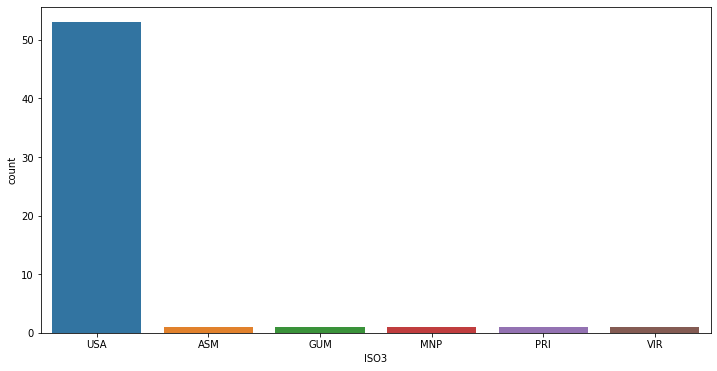

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='ISO3',data=df)
df['ISO3'].value_counts()

USA have the maximum values present.

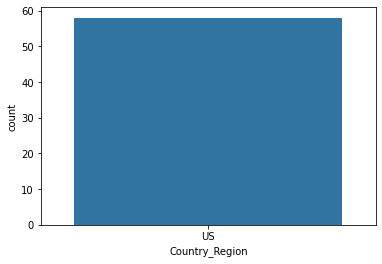

In [10]:
sns.countplot(x='Country_Region',data=df)

all the data is presenr in us country so we can drop this column

In [11]:
df.drop(['Country_Region'],axis=1,inplace=True)

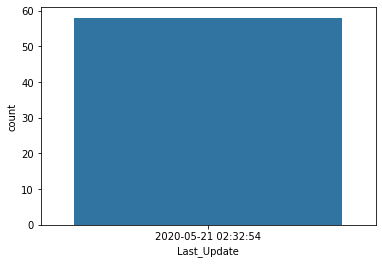

In [12]:
sns.countplot(x='Last_Update',data=df)

ony one value is present so we can drop this column too.

In [13]:
df.drop(['Last_Update'],axis=1,inplace=True)

In [14]:
df

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,32.318200,-86.902300,13052,522,7007.428571,12530.0,1,266.194321,1.644500e+05,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,61.370700,-152.404400,401,10,352.000000,39.0,2,54.815493,3.704500e+04,4897.454545,2.493766,84000002,USA,5063.940017,14.342541
2,American Samoa,-14.271000,-170.132000,0,0,7007.428571,0.0,60,0.000000,1.240000e+02,4897.454545,4.458248,16,ASM,222.857246,14.342541
3,Arizona,33.729800,-111.431200,14906,747,3773.000000,10386.0,4,204.788838,1.654350e+05,1792.000000,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,34.969700,-92.373100,5003,107,3852.000000,1044.0,5,165.782801,9.625800e+04,535.000000,2.138717,84000005,USA,3189.670370,10.693584
5,California,36.116200,-119.681600,85997,3497,7007.428571,82500.0,6,217.646575,1.380120e+06,4897.454545,4.066421,84000006,USA,3492.893832,14.342541
6,Colorado,39.059800,-105.311100,22797,1299,3478.000000,18020.0,8,395.868121,1.318370e+05,3955.000000,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,41.597800,-72.755400,39017,3529,6264.000000,29224.0,9,1094.357902,1.907180e+05,10946.000000,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,39.318500,-75.507100,8194,310,3965.000000,3919.0,10,841.476990,4.541200e+04,4897.454545,3.783256,84000010,USA,4663.552976,14.342541
9,Diamond Princess,36.840089,-85.206614,49,0,7007.428571,49.0,88888,396.230806,2.258534e+05,4897.454545,0.000000,84088888,USA,3894.186870,14.342541


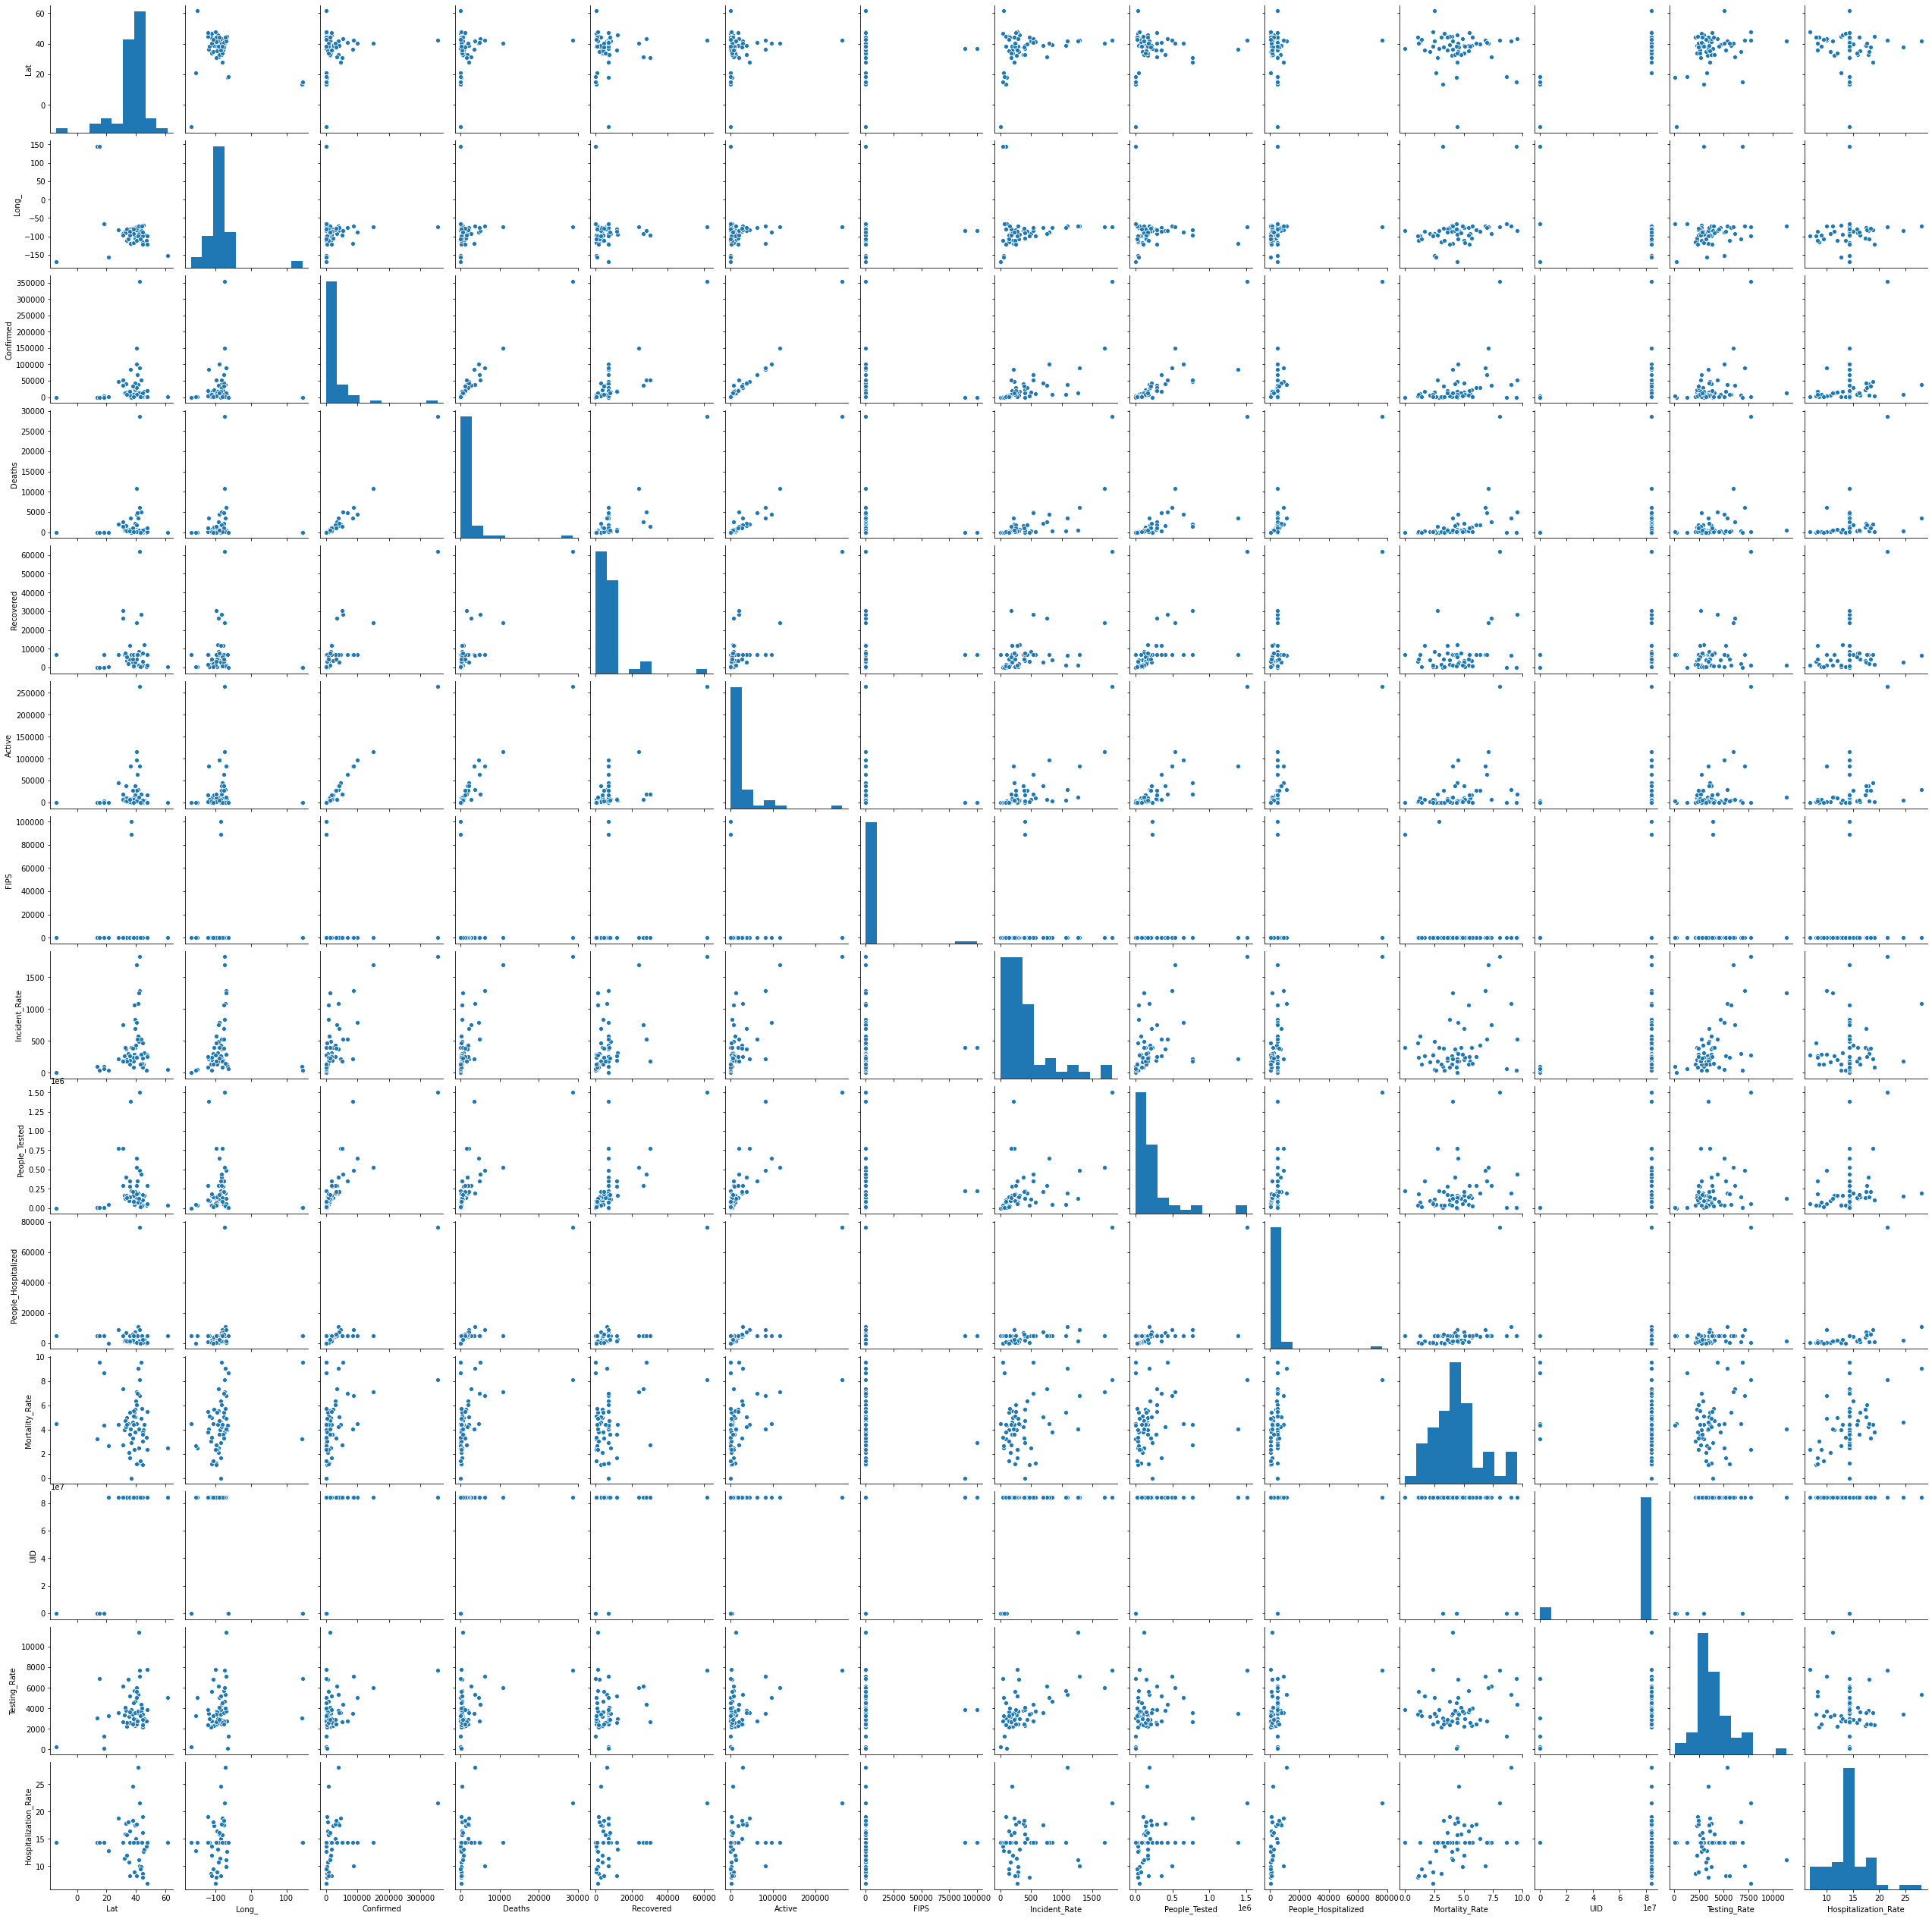

In [15]:
sns.pairplot(df)

# bivirate analysis.

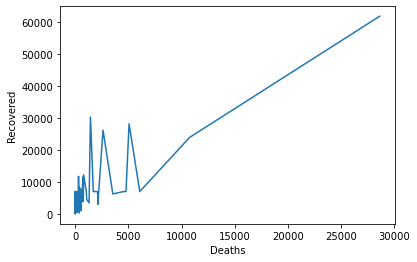

In [19]:
sns.lineplot(y='Recovered',x='Deaths',data=df)

deaths are increasing at fast rate.

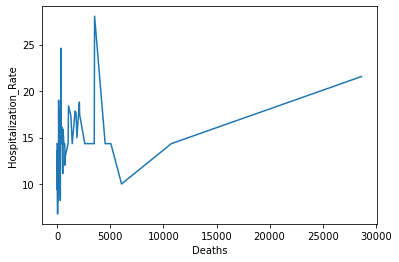

In [20]:
sns.lineplot(y='Hospitalization_Rate',x='Deaths',data=df)

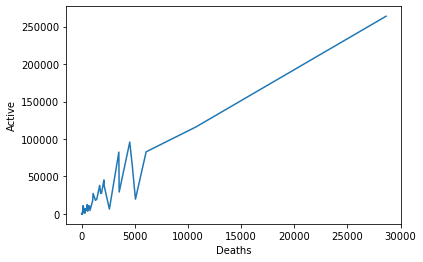

In [21]:
sns.lineplot(y='Active',x='Deaths',data=df)

both active and deaths are increasing at a very fast rate.

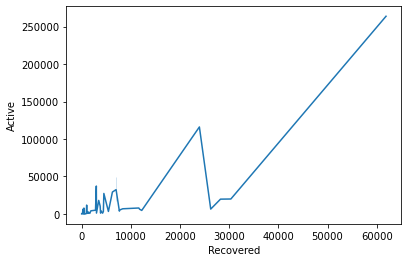

In [22]:
sns.lineplot(y='Active',x='Recovered',data=df)

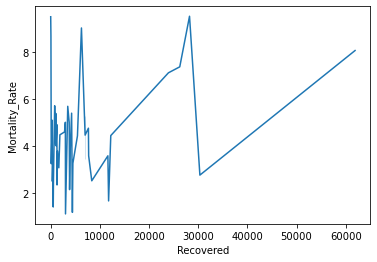

In [23]:
sns.lineplot(y='Mortality_Rate',x='Recovered',data=df)

values as per the type Province_State            Deaths
Alabama                   522       1
Alaska                    10        1
American Samoa            0         1
Arizona                   747       1
Arkansas                  107       1
California                3497      1
Colorado                  1299      1
Connecticut               3529      1
Delaware                  310       1
Diamond Princess          0         1
District of Columbia      407       1
Florida                   2096      1
Georgia                   1697      1
Grand Princess            3         1
Guam                      5         1
Hawaii                    17        1
Idaho                     77        1
Illinois                  4525      1
Indiana                   1864      1
Iowa                      393       1
Kansas                    202       1
Kentucky                  376       1
Louisiana                 2608      1
Maine                     73        1
Maryland                  2123  

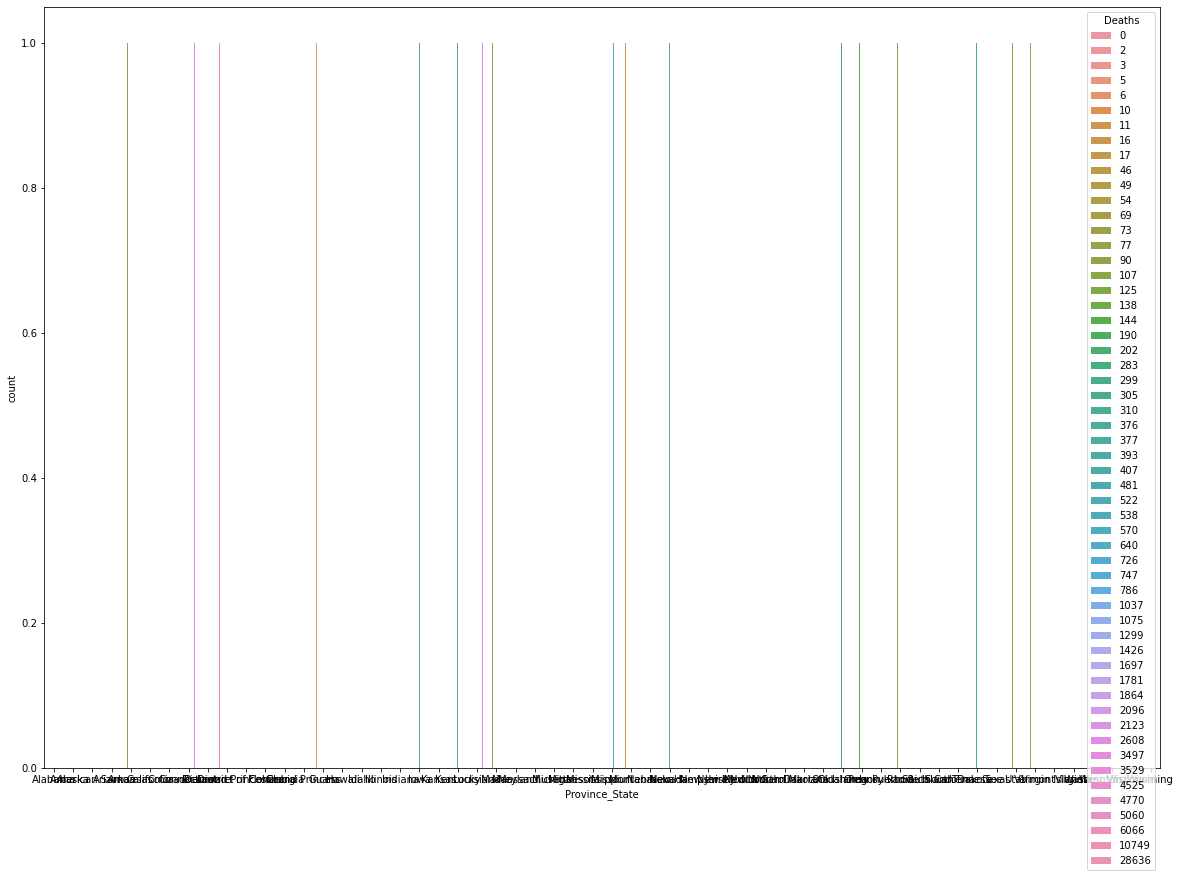

In [27]:
plt.figure(figsize=(20,14))
sns.countplot(x='Province_State',hue='Deaths',data=df)
print('values as per the type',df.groupby('Province_State')['Deaths'].value_counts())

new york state have the highest deaths compared to diomomd princess, american samao

# removing outliers.

In [16]:
z_score=df.drop(['Province_State','ISO3'],axis=1)

In [17]:
df.dtypes

Province_State           object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [18]:
threshold=3
z=np.abs(zscore(z_score))
z

array([[4.26523477e-01, 3.49982309e-02, 2.62999251e-01, 2.68934023e-01,
        0.00000000e+00, 1.84202386e-01, 1.90471516e-01, 3.31615693e-01,
        2.11041917e-01, 3.47604767e-01, 2.18727182e-01, 3.06995177e-01,
        2.86980973e-01, 7.74497410e-01],
       [2.31382962e+00, 1.38693367e+00, 5.05788407e-01, 3.95372994e-01,
        6.78047590e-01, 4.89328519e-01, 1.90413571e-01, 8.70668532e-01,
        6.48929571e-01, 0.00000000e+00, 9.36418161e-01, 3.06995220e-01,
        6.21379592e-01, 4.73806709e-16],
       [4.82101134e+00, 1.75282379e+00, 5.13484119e-01, 3.97842505e-01,
        0.00000000e+00, 4.90281199e-01, 1.87052738e-01, 1.01045759e+00,
        7.75826083e-01, 0.00000000e+00, 0.00000000e+00, 3.25578286e+00,
        1.95023139e+00, 4.73806709e-16],
       [2.93375472e-01, 5.41264279e-01, 2.27418578e-01, 2.13370022e-01,
        3.29519951e-01, 2.36575329e-01, 1.90297680e-01, 4.88210372e-01,
        2.07656498e-01, 3.17075993e-01, 2.63675605e-01, 3.06995304e-01,
        8.612

In [19]:
df_new=z_score[(z<3).all(axis=1)]

In [20]:
df_new.shape

(46, 14)

In [21]:
df.shape

(58, 16)

In [22]:
df=df_new

In [23]:
df.shape

(46, 14)

In [39]:
y=df['Deaths']

In [41]:
x=df.drop('Deaths',axis=1)
x.shape

(46, 13)

In [42]:
sc=StandardScaler()
x=sc.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.118961,0.404213,-0.291343,0.143608,-0.084273,-1.805758,-0.292230,-0.159548,-0.724278,-0.111646,-1.805758,-0.296779,-0.723172
1,3.500446,-3.080612,-0.847810,-0.849468,-0.679443,-1.741960,-1.090798,-0.856627,0.651322,-0.965238,-1.741960,0.979476,0.110579
2,-0.894514,-0.900767,-0.209793,-0.339011,-0.186430,-1.614364,-0.524214,-0.154159,-0.603465,0.462104,-1.614364,-1.103644,-0.555731
3,-0.697367,0.113157,-0.645387,-0.327223,-0.631556,-1.550566,-0.671575,-0.532651,-1.111367,-1.166528,-1.550566,-0.419383,-0.937168
4,-0.047033,-0.575167,0.137300,-0.383029,0.177314,-1.359172,0.197665,-0.337986,0.270515,0.851427,-1.359172,-1.091345,0.973777
5,-0.005899,1.010457,-0.505027,-0.310362,-0.494569,-1.231577,1.881131,-0.810848,0.651322,-0.234179,-1.231577,0.680647,0.110579
6,-0.072855,0.929606,-0.533310,-0.743975,-0.391363,-1.167779,2.744193,-0.838167,0.651322,0.676751,-1.167779,1.474430,0.110579
7,-1.842723,0.681686,1.222611,0.143608,1.480723,-1.103981,-0.462878,3.161013,2.282325,0.124166,-1.103981,-0.119565,1.396194
8,-1.004098,0.577608,0.885239,0.143608,1.134275,-1.040183,0.118317,1.145318,1.544109,0.038209,-1.040183,0.032466,1.119516
9,-2.903585,-3.351616,-0.837166,-0.815746,-0.679014,-0.912587,-1.126317,-0.805968,-1.294405,-0.880146,-0.912587,-0.359167,-0.345915


In [43]:
model=[LinearRegression(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),ExtraTreesRegressor()]

In [46]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80,random_state=42)
    m.fit(x_train,y_train)
    print('the score for',m,m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('errors for:',m)
    print('Mean Squared Error:',mean_squared_error(y_test,predm))
    print('Mean Absolute Error:',mean_absolute_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('______________________________________________________________________________________')

the score for LinearRegression() 0.964387100689407
errors for: LinearRegression()
Mean Squared Error: 94813.93723266319
Mean Absolute Error: 251.7352340966735
Root Mean Squared Error: 307.9187185486832
r2_score: 0.7686020401451511
______________________________________________________________________________________
the score for SVR() -0.19180108953712027
errors for: SVR()
Mean Squared Error: 543309.0396212343
Mean Absolute Error: 532.9561675862162
Root Mean Squared Error: 737.0950004044488
r2_score: -0.32597176120369364
______________________________________________________________________________________
the score for KNeighborsRegressor() 0.8123577831840951
errors for: KNeighborsRegressor()
Mean Squared Error: 130675.46800000004
Mean Absolute Error: 248.93999999999997
Root Mean Squared Error: 361.49061951868134
r2_score: 0.6810802548566598
______________________________________________________________________________________
the score for DecisionTreeRegressor() 1.0
errors for: Dec

as per this conclusion aur model GradientBootingRegressor is performing best among other models.

In [48]:
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Model',m)
    print('score',score)
    print('mean score of',m,'is:',score.mean())
    print('standard deviation of',m,'is-',score.std())
    print('_________________________________________________________________')

Model LinearRegression()
score [0.08698556 0.8347345  0.90784845 0.94205431 0.06049112]
mean score of LinearRegression() is: 0.566422788150461
standard deviation of LinearRegression() is- 0.4038535881923676
_________________________________________________________________
Model SVR()
score [-0.22869013 -0.42930085 -0.27608596 -0.13679658 -0.03340634]
mean score of SVR() is: -0.22085597307070234
standard deviation of SVR() is- 0.13323988724422342
_________________________________________________________________
Model KNeighborsRegressor()
score [0.68182887 0.81440963 0.65533441 0.39766985 0.520293  ]
mean score of KNeighborsRegressor() is: 0.6139071526598372
standard deviation of KNeighborsRegressor() is- 0.14286567517668944
_________________________________________________________________
Model DecisionTreeRegressor()
score [ 0.80937453  0.41883018  0.6909316   0.95028129 -5.04164712]
mean score of DecisionTreeRegressor() is: -0.43444590562097296
standard deviation of DecisionTreeRegre